## "Visualization of Per Capita Income of Indian States: Choropleth Map Analysis"

In [1]:
import requests

url = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita'
response = requests.get(url)
content = response.content


In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(content, 'html.parser')
table = soup.find('table', class_='wikitable')

data = []
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) >= 3:
        state = columns[1].text.strip()
        income = columns[2].text.strip().replace('₹', '').replace(',', '')
        data.append((state, int(income)))


In [3]:
data

[('Goa', 435959),
 ('Sikkim', 403376),
 ('Delhi', 376221),
 ('Chandigarh', 330015),
 ('Haryana', 247628),
 ('Telangana', 233325),
 ('Karnataka', 223175),
 ('Kerala', 221904),
 ('Puducherry', 220949),
 ('Andaman and Nicobar Islands', 218649),
 ('Gujarat', 213936),
 ('Tamil Nadu', 213396),
 ('Uttarakhand', 202895),
 ('Maharashtra', 202130),
 ('Himachal Pradesh', 190407),
 ('Mizoram', 187327),
 ('Arunachal Pradesh', 169742),
 ('Andhra Pradesh', 168480),
 ('Punjab', 151491),
 ('India', 147210),
 ('Tripura', 129675),
 ('West Bengal', 121463),
 ('Nagaland', 120518),
 ('Rajasthan', 116492),
 ('Odisha', 109730),
 ('Chhattisgarh', 104989),
 ('Jammu and Kashmir', 104889),
 ('Madhya Pradesh', 98418),
 ('Assam', 86801),
 ('Manipur', 84746),
 ('Meghalaya', 82182),
 ('Jharkhand', 75739),
 ('Uttar Pradesh', 65431),
 ('Bihar', 46292)]

In [4]:
import pandas as pd

df = pd.DataFrame(data, columns=['State', 'Income'])

In [5]:
df

,State,Income
0,Goa,435959
1,Sikkim,403376
2,Delhi,376221
3,Chandigarh,330015
4,Haryana,247628
5,Telangana,233325
6,Karnataka,223175
7,Kerala,221904
8,Puducherry,220949
9,Andaman and Nicobar Islands,218649


In [6]:
# df.to_csv('income.csv')

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = 'F:\\newbieron\\Task-3\\states_india\\states_india.shp'
map_df = gpd.read_file(shapefile_path)

# Modify the state name in the DataFrame to match the shapefile
df['State'] = df['State'].replace('Jammu and Kashmir', 'Jammu & Kashmir')



In [18]:
# Merge the shapefile with the per capita income data
merged = map_df.set_index('st_nm').join(df.set_index('State'))

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_17388\4086208841.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid'] = merged.geometry.centroid


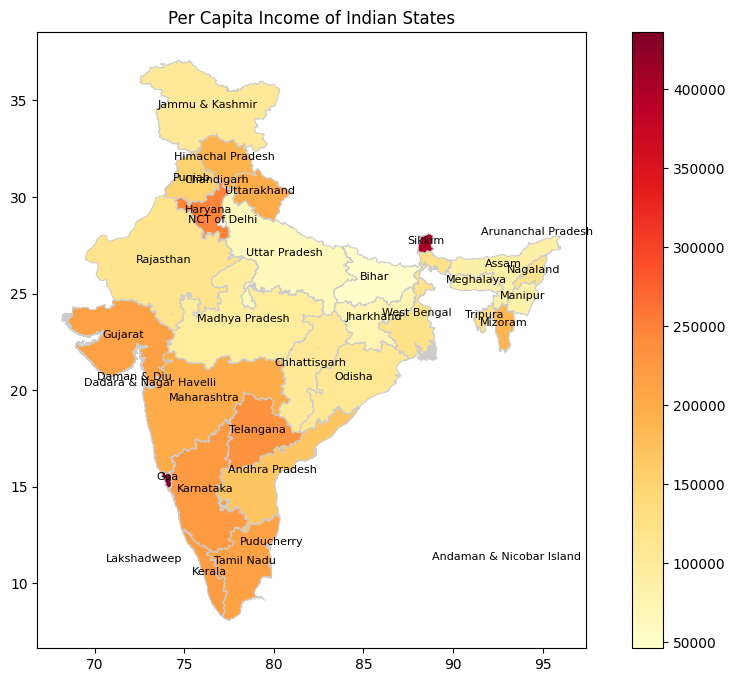

In [19]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the choropleth map with a custom color scheme
merged.plot(column='Income', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add state names as labels
merged['centroid'] = merged.geometry.centroid
for x, y, label in zip(merged['centroid'].x, merged['centroid'].y, merged.index):
    ax.text(x, y, label, fontsize=8, ha='center')


# Set the chart title
plt.title('Per Capita Income of Indian States')

# Display the chart
plt.show()